In [1]:
import numpy as np
import camb
import matplotlib.pyplot as plt
from Powerspec import *

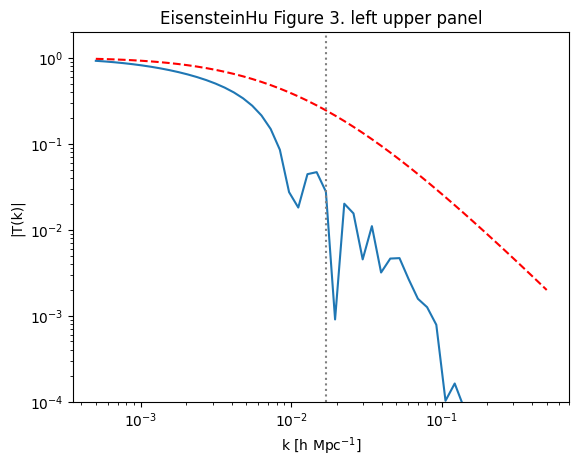

In [2]:
om0h2 = 0.2*0.5**2
ombh2 = om0h2*1
pars = EisensteinHu(ombh2=ombh2, omch2=om0h2-ombh2, h=0.5)
karr = np.logspace(-3,0,50)
p= np.abs(pars.Transfer_function(karr))
loc = pars.first_peak()
q = pars.Transfer_function_zero_baryon(karr)
plt.plot(karr*0.5, p)
plt.plot(karr*0.5, q, linestyle='--', color='red')
plt.axvline(loc*0.5, linestyle=':', color='gray')
plt.ylim(1e-4,2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('|T(k)|')
plt.title('EisensteinHu Figure 3. left upper panel')
plt.savefig('./figs/EH_figure3_left_upper.png', dpi=300)
plt.show()

In [3]:
om0h2 = 0.13348568
ombh2 = 0.02258368
omch2 = om0h2 - ombh2
pars2 =  EisensteinHu(ombh2=ombh2, omch2=omch2, h=0.71, TCMB=2.725)
print(pars2.zdrag)

1020.3206045824348


In [4]:
from camb import model

In [30]:
karr = np.logspace(-3,0,50)
kharr = karr*pars2.h
pars_CAMB = camb.CAMBparams()
hubble = pars2.h * 100
pars_CAMB.set_cosmology(H0=hubble, ombh2=ombh2, omch2=omch2, TCMB = 2.725)
pars_CAMB.set_dark_energy() #re-set defaults
pars_CAMB.InitPower.set_params(As=pars2.As,ns=pars2.ns)
pars_CAMB.set_matter_power(redshifts=[0.], kmax=2.0)
results_CAMB = camb.get_results(pars_CAMB)
transfer = results_CAMB.get_matter_transfer_data()
kh = transfer.transfer_data[0, :, 0]
delta = transfer.transfer_data[model.Transfer_kh, :, 0]

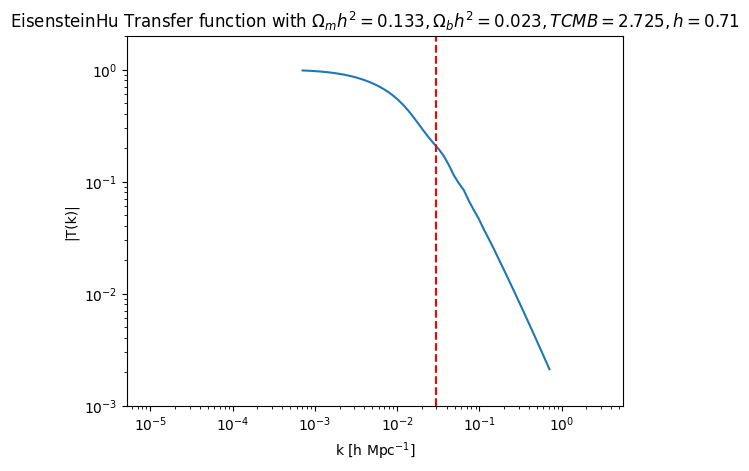

In [31]:

karr = np.logspace(-3,0,50)
p= pars2.Transfer_function(karr)
loc = pars2.first_peak()
plt.plot(kharr, p, label = 'EisensteinHu')
plt.plot(kh, delta, linestyle=':', color='blue', label='CAMB')
#plt.plot(karr*pars2.h, q, linestyle='--', color='red')
plt.axvline(loc*pars2.h, color='r', linestyle='--', label=f'First Peak at k={loc:.3f} kMpc$^{{-1}}$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,2)
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('|T(k)|')
plt.title(rf'EisensteinHu Transfer function with $\Omega_mh^2 = {pars2.om0h2:.3f}, \Omega_bh^2 = {pars2.ombh2:.3f}, TCMB = {pars2.TCMB:.3f}, h = {pars2.h:.2f}$')
plt.savefig('./figs/EH_Transfer_CAMB_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

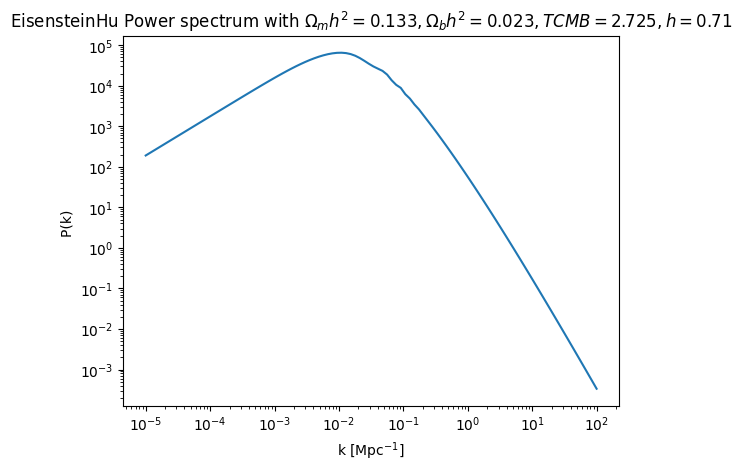

In [12]:
karr2 = np.logspace(-5,2,100)
ps = pars2.Power_spectrum_0(karr2)
plt.loglog(karr2, ps)
plt.xlabel('k [Mpc$^{-1}$]')
plt.ylabel('P(k) ')
plt.title(rf'EisensteinHu Power spectrum with $\Omega_mh^2 = {pars2.om0h2:.3f}, \Omega_bh^2 = {pars2.ombh2:.3f}, TCMB = {pars2.TCMB:.3f}, h = {pars2.h:.2f}$')
plt.savefig('./figs/EH_Power_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
pars2.Sigma_R(8)

0.7553043387097387

0.5536167979002934
0.09441023832083474
0.2 0.20000000000000004
